In [1]:
# univariate lstm
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# logic
def logic(timeseries_data,n_features):
    X,y = [],[]
    for i in range(len(timeseries_data)):  # len = 9
        end_idx = i + n_features  # 0+3=3, 1+3 =4
        if end_idx > len(timeseries_data)-1:
            break
        seq_x = timeseries_data[i:end_idx]     # data[0:3], data[1:4]    
        seq_y = timeseries_data[end_idx]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X),np.array(y)   
        
    

In [3]:
# define input sequence
#                   0   1   2   3   4   5   6   7   8 
timeseries_data = [110,125,133,146,158,172,187,196,210]

# define number of time steps
n_steps = 3
# split into independent and dependent data
X,y = logic(timeseries_data,n_steps)





In [4]:
print(X)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [5]:
print(y)

[146 158 172 187 196 210]


In [6]:
X.shape

(6, 3)

In [7]:
y.shape

(6,)

In [8]:
# we have make this data as 3 dim in order to pass through the LSTM
X = X.reshape(X.shape[0],X.shape[1],1)

In [9]:
print(X)

[[[110]
  [125]
  [133]]

 [[125]
  [133]
  [146]]

 [[133]
  [146]
  [158]]

 [[146]
  [158]
  [172]]

 [[158]
  [172]
  [187]]

 [[172]
  [187]
  [196]]]


In [10]:
X.shape

(6, 3, 1)

In [11]:
# build the lstm model
model = Sequential()
model.add(LSTM(50,activation= 'relu',return_sequences = True,input_shape = (n_steps,1)))
model.add(LSTM(50,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss = 'mse')
model.fit(X,y,epochs = 500,verbose = 1 )

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 32342.8281
Epoch 2/500
1/1 [==============================] - 0s 0s/step - loss: 31933.2559
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 31586.4707
Epoch 4/500
1/1 [==============================] - 0s 0s/step - loss: 31298.0723
Epoch 5/500
1/1 [==============================] - 0s 0s/step - loss: 31055.2324
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 30831.4297
Epoch 7/500
1/1 [==============================] - 0s 0s/step - loss: 30615.4297
Epoch 8/500
1/1 [==============================] - 0s 0s/step - loss: 30402.5332
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 30186.6973
Epoch 10/500
1/1 [==============================] - 0s 0s/step - loss: 29966.0703
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 29740.1152
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 29508.1660
Epoch 13/500
1/1 [==

1/1 [==============================] - 0s 0s/step - loss: 10.7200
Epoch 103/500
1/1 [==============================] - 0s 8ms/step - loss: 10.7221
Epoch 104/500
1/1 [==============================] - 0s 0s/step - loss: 10.7921
Epoch 105/500
1/1 [==============================] - 0s 8ms/step - loss: 10.8969
Epoch 106/500
1/1 [==============================] - 0s 8ms/step - loss: 11.0045
Epoch 107/500
1/1 [==============================] - 0s 0s/step - loss: 11.0884
Epoch 108/500
1/1 [==============================] - 0s 8ms/step - loss: 11.1314
Epoch 109/500
1/1 [==============================] - 0s 8ms/step - loss: 11.1261
Epoch 110/500
1/1 [==============================] - 0s 0s/step - loss: 11.0748
Epoch 111/500
1/1 [==============================] - 0s 8ms/step - loss: 10.9872
Epoch 112/500
1/1 [==============================] - 0s 0s/step - loss: 10.8776
Epoch 113/500
1/1 [==============================] - 0s 8ms/step - loss: 10.7617
Epoch 114/500
1/1 [============================

1/1 [==============================] - 0s 0s/step - loss: 4.9401
Epoch 205/500
1/1 [==============================] - 0s 8ms/step - loss: 4.8850
Epoch 206/500
1/1 [==============================] - 0s 0s/step - loss: 4.8057
Epoch 207/500
1/1 [==============================] - 0s 8ms/step - loss: 4.7257
Epoch 208/500
1/1 [==============================] - 0s 0s/step - loss: 4.6757
Epoch 209/500
1/1 [==============================] - 0s 8ms/step - loss: 4.5939
Epoch 210/500
1/1 [==============================] - 0s 0s/step - loss: 4.5475
Epoch 211/500
1/1 [==============================] - 0s 8ms/step - loss: 4.4662
Epoch 212/500
1/1 [==============================] - 0s 0s/step - loss: 4.4219
Epoch 213/500
1/1 [==============================] - 0s 8ms/step - loss: 4.3710
Epoch 214/500
1/1 [==============================] - 0s 8ms/step - loss: 4.3240
Epoch 215/500
1/1 [==============================] - 0s 0s/step - loss: 4.2994
Epoch 216/500
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 8ms/step - loss: 3.2080
Epoch 308/500
1/1 [==============================] - 0s 8ms/step - loss: 3.1869
Epoch 309/500
1/1 [==============================] - 0s 0s/step - loss: 3.1791
Epoch 310/500
1/1 [==============================] - 0s 8ms/step - loss: 3.1771
Epoch 311/500
1/1 [==============================] - 0s 0s/step - loss: 3.1635
Epoch 312/500
1/1 [==============================] - 0s 0s/step - loss: 3.1462
Epoch 313/500
1/1 [==============================] - 0s 8ms/step - loss: 3.1394
Epoch 314/500
1/1 [==============================] - 0s 0s/step - loss: 3.1328
Epoch 315/500
1/1 [==============================] - 0s 8ms/step - loss: 3.1168
Epoch 316/500
1/1 [==============================] - 0s 0s/step - loss: 3.1025
Epoch 317/500
1/1 [==============================] - 0s 8ms/step - loss: 3.0947
Epoch 318/500
1/1 [==============================] - 0s 8ms/step - loss: 3.0831
Epoch 319/500
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 1.2107
Epoch 411/500
1/1 [==============================] - 0s 8ms/step - loss: 1.1947
Epoch 412/500
1/1 [==============================] - 0s 0s/step - loss: 1.1637
Epoch 413/500
1/1 [==============================] - 0s 8ms/step - loss: 1.1593
Epoch 414/500
1/1 [==============================] - 0s 0s/step - loss: 1.1215
Epoch 415/500
1/1 [==============================] - 0s 8ms/step - loss: 1.1171
Epoch 416/500
1/1 [==============================] - 0s 0s/step - loss: 1.0876
Epoch 417/500
1/1 [==============================] - 0s 0s/step - loss: 1.0725
Epoch 418/500
1/1 [==============================] - 0s 8ms/step - loss: 1.0572
Epoch 419/500
1/1 [==============================] - 0s 0s/step - loss: 1.0313
Epoch 420/500
1/1 [==============================] - 0s 8ms/step - loss: 1.0239
Epoch 421/500
1/1 [==============================] - 0s 0s/step - loss: 0.9977
Epoch 422/500
1/1 [==============================] - 0s 0s/st

In [56]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):  0 <10;
    
    if(len(temp_input)>3):  # 4 > 3 yes, 4 > 3 yes, 5 >3 
        x_input=np.array(temp_input[1:])  # [196,210,225], [210, 225, 229],  [210, 225, 229, 231] 
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, 1))  # [1,3,1]
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)   # [229],[231],[232]
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])   # [187, 196, 210, 225, 229, 231], 
        temp_input=temp_input[1:]  # [196, 210, 225, 229, 231]
        #print(temp_input)
        lst_output.append(yhat[0][0])  # [225, 229],[225, 229, 231]
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))  #[1,3,1]
        yhat = model.predict(x_input, verbose=0)  #225.345
        print(yhat[0])
        temp_input.append(yhat[0][0])   # [187, 196, 210, 225]
        lst_output.append(yhat[0][0])   # [225]
        i=i+1
    

print(lst_output)

[222.9658]
1 day input [196.         210.         222.96580505]
1 day output [[231.54701]]
2 day input [210.         222.96580505 231.54701233]
2 day output [[244.04579]]
3 day input [222.9658  231.54701 244.04579]
3 day output [[256.58438]]
4 day input [231.54701 244.04579 256.58438]
4 day output [[265.46356]]
5 day input [244.04579 256.58438 265.46356]
5 day output [[277.14658]]
6 day input [256.58438 265.46356 277.14658]
6 day output [[289.64264]]
7 day input [265.46356 277.14658 289.64264]
7 day output [[299.09488]]
8 day input [277.14658 289.64264 299.09488]
8 day output [[310.32837]]
9 day input [289.64264 299.09488 310.32837]
9 day output [[322.8294]]
[222.9658, 231.54701, 244.04579, 256.58438, 265.46356, 277.14658, 289.64264, 299.09488, 310.32837, 322.8294]


In [71]:
# plotting
import matplotlib.pyplot as plt
data_new = np.arange(1,10)
data_pred = np.arange(10,20)

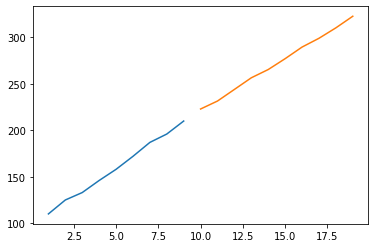

In [72]:
plt.plot(data_new, timeseries_data)
plt.plot(data_pred, lst_output)